In [1]:
#libraries 
import pandas as pd
import gzip
from tqdm import tqdm

from datetime import datetime
from datetime import date, time
from dateutil.parser import parse
import numpy as np



from bokeh.plotting import figure, output_notebook, show,output_file,gridplot
from bokeh.models import DatetimeTickFormatter,HoverTool,Span

import json
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
#load the dataframe for a given product only (is it possible?)
pickle_off = open("electronics_meta_sentiment.pickle","rb")
df = pickle.load(pickle_off)

In [3]:
l=[]
for i in df.index:
    if df.helpful[i][1]==0:
        l.append(None)
    else:
        l.append(df.helpful[i][0]/df.helpful[i][1])
df['helpfulness']=l
del df['helpful']
del df['unixReviewTime']

In [4]:
evolution= df.groupby(['sub_category_1','reviewTime']).median()
evolution['number_reviews']=df.groupby(['sub_category_1','reviewTime']).count().asin
evolution.year=list(map(lambda x:int(x) , evolution.year))


In [5]:
categories=list(set(df.sub_category_1))
categories=['Computers & Accessories' , 'Accessories & Supplies' , 'Camera & Photo' , 'Portable Audio & Video']
colors=['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']
    

In [6]:
def compare_timeline(p,variable,category,c='navy'):
    data=evolution.loc[category,variable]
    avg=data.rolling(15,center=True).median()
    #hover=HoverTool(tooltips=[( 'Year',   '@year'),( category,  '@'+str(variable) ),],)
    p.line(data.index.values,avg,color=c,legend=str(category))
    p.xaxis[0].formatter = DatetimeTickFormatter(days='%m/%d',years='%Y',months='%B')
    return p

In [7]:
p = figure(width=1000, height=500, x_axis_type="datetime",tools=['pan','wheel_zoom','box_zoom','reset'])
output_file('evolution.html')
i=0
for cat in categories:
    p=compare_timeline(p,'number_reviews',str(cat),c=colors[i])
    i=i+1
p.title.text='evolution of the median daily number of reviews' 
p.legend.location = "top_left"
p.grid.grid_line_alpha=0
p.xaxis.axis_label = 'Date'
show(p)

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [60]:
df1=df[(df.year>2007)&(df.year<2012)]
df2=df[df.year>2007]
ev1= df1.groupby(['reviewTime']).median()
ev1['number_reviews']=df1.groupby(['reviewTime']).count().asin
ev1.year=list(map(lambda x:int(x) , ev1.year))

ev2= df2.groupby(['reviewTime']).median()
ev2['number_reviews']=df2.groupby(['reviewTime']).count().asin
ev2.year=list(map(lambda x:int(x) , ev2.year))


In [61]:
variable='number_reviews'
data2=pd.Series(ev2[variable])
res2 = seasonal_decompose(data2,freq=365)


Text(0,0.5,'Residual')

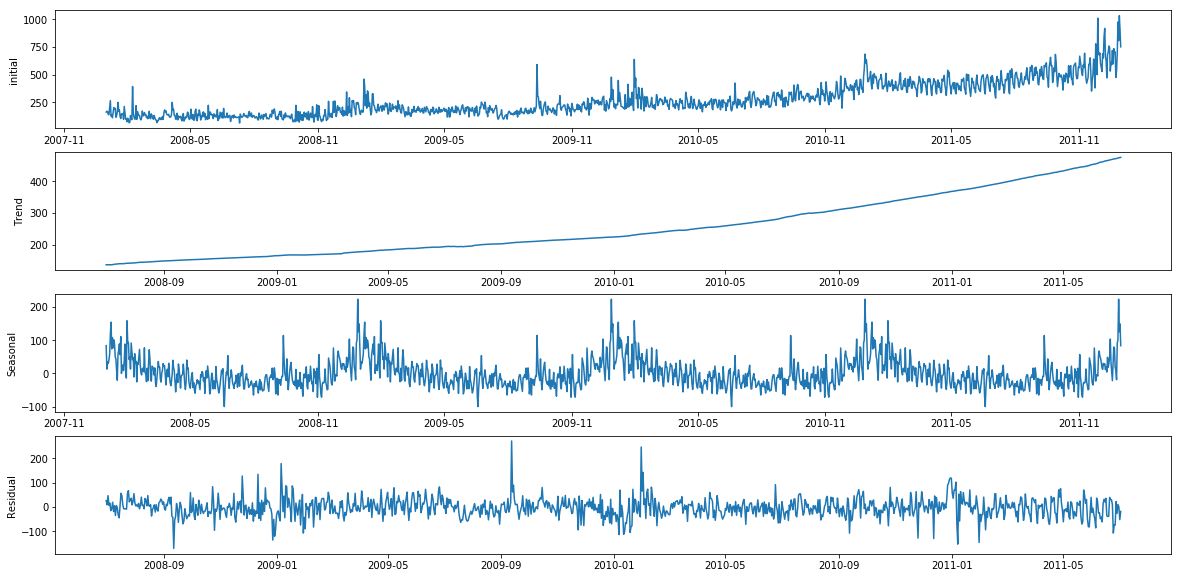

In [62]:
plt.figure(figsize=(20,10))
plt.subplot(4,1,1)
plt.plot(res1.observed)
plt.ylabel('initial')
plt.subplot(4,1,2)
plt.plot(res1.trend)
plt.ylabel('Trend')
plt.subplot(4,1,3)
plt.plot(res1.seasonal)
plt.ylabel('Seasonal')
plt.subplot(4,1,4)
plt.plot(res1.resid)
plt.ylabel('Residual')

In [110]:
res1.resid.argmax()

/Users/sonia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2009-09-12 00:00:00')

Text(0,0.5,'Residual')

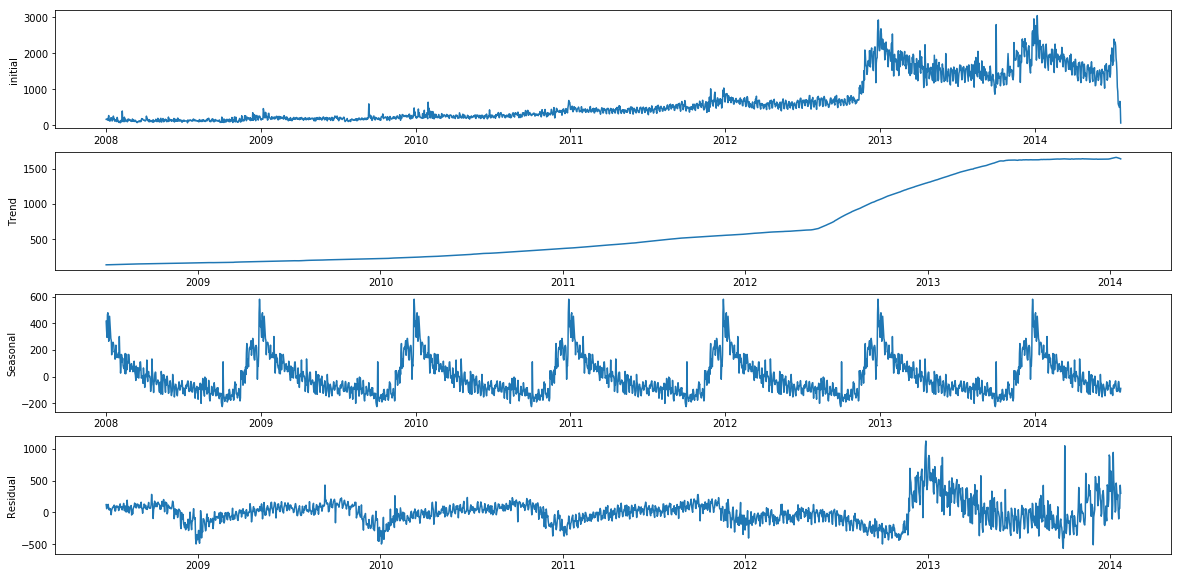

In [63]:
plt.figure(figsize=(20,10))
plt.subplot(4,1,1)
plt.plot(res2.observed)
plt.ylabel('initial')
plt.subplot(4,1,2)
plt.plot(res2.trend)
plt.ylabel('Trend')
plt.subplot(4,1,3)
plt.plot(res2.seasonal)
plt.ylabel('Seasonal')
plt.subplot(4,1,4)
plt.plot(res2.resid)
plt.ylabel('Residual')

In [83]:
res3=seasonal_decompose(res1.resid.dropna(),freq=7)

Text(0,0.5,'Residual')

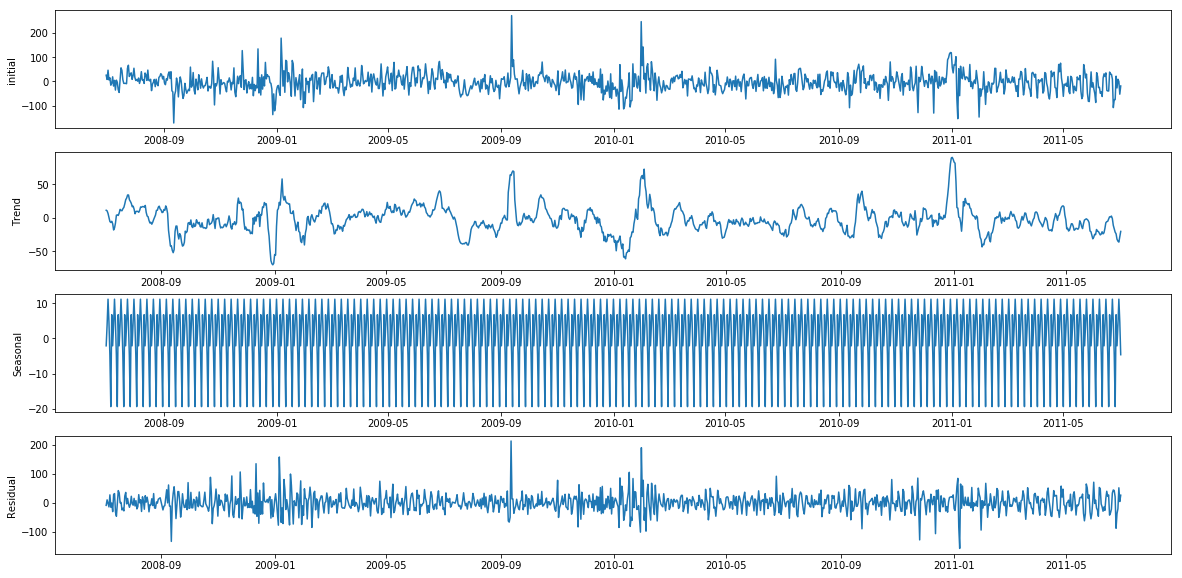

In [84]:
plt.figure(figsize=(20,10))
plt.subplot(4,1,1)
plt.plot(res3.observed)
plt.ylabel('initial')
plt.subplot(4,1,2)
plt.plot(res3.trend)
plt.ylabel('Trend')
plt.subplot(4,1,3)
plt.plot(res3.seasonal)
plt.ylabel('Seasonal')
plt.subplot(4,1,4)
plt.plot(res3.resid)
plt.ylabel('Residual')

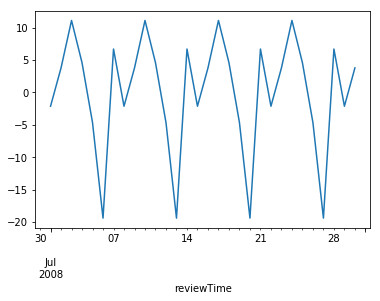

In [85]:
res3.seasonal[0:30].plot()

In [94]:
p = figure(width=1000, height=500, x_axis_type="datetime",tools=['pan','wheel_zoom','box_zoom','reset'])
output_file('evolution.html')
i=0
for cat in categories:
    p=compare_timeline(p,'length_review',str(cat),c=colors[i])
    i=i+1
p.title.text='evolution of the median daily number of reviews' 
p.legend.location = "top_left"
p.grid.grid_line_alpha=0
p.xaxis.axis_label = 'Date'
show(p)

In [93]:
def compare_timeline(p,variable,category,c='navy'):
    data=evolution.loc[category,variable]
    avg=data.rolling(30,center=True).median()
    #hover=HoverTool(tooltips=[( 'Year',   '@year'),( category,  '@'+str(variable) ),],)
    p.line(data.index.values,avg,color=c,legend=str(category))
    p.xaxis[0].formatter = DatetimeTickFormatter(days='%m/%d',years='%Y',months='%B')
    return p

In [99]:

variable='length_review'
data5=pd.Series(ev2[variable])
res5 = seasonal_decompose(data5,freq=365)


Text(0,0.5,'Residual')

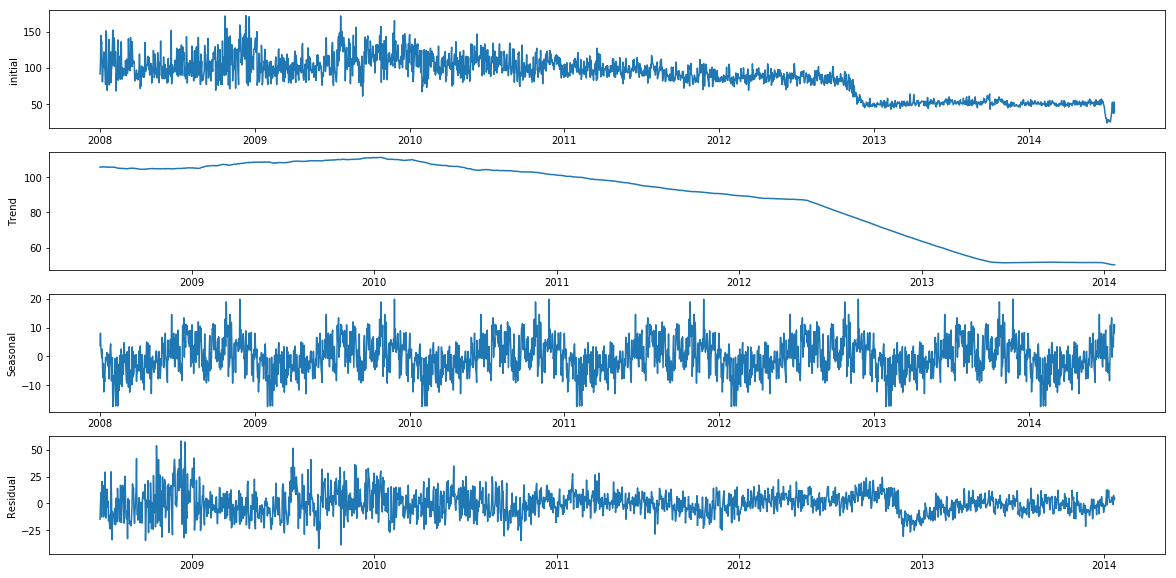

In [100]:
plt.figure(figsize=(20,10))
plt.subplot(4,1,1)
plt.plot(res5.observed)
plt.ylabel('initial')
plt.subplot(4,1,2)
plt.plot(res5.trend)
plt.ylabel('Trend')